[28.94734377 24.323956   16.73846999 12.67067658  8.66221179  2.96772242
  0.        ]


<>:85: SyntaxWarning: invalid escape sequence '\D'
<>:85: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_1336/3921405334.py:85: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel("$\Delta$E (eV)")


Text(0.5, 1.0, 'Lu Energy (relative to lowest spin)')

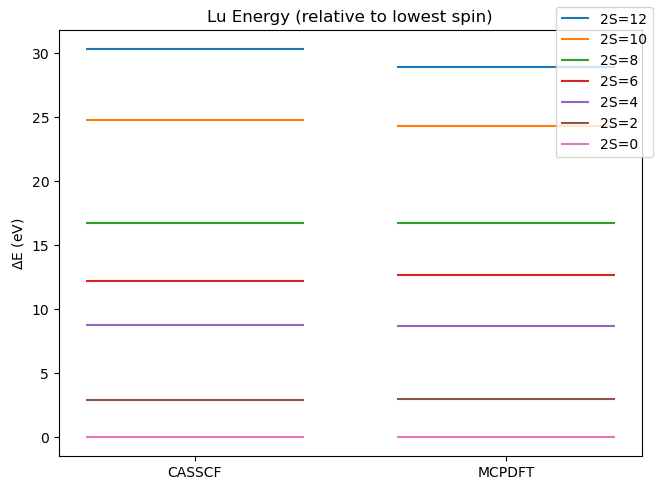

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import csv
def ladder_plot(data, labels=None, categories=None, zero_idx=None, scale:float=1, color=None, linestyles='solid'):
    import numpy as np
    from collections.abc import Iterable
    
    data = np.atleast_2d(data)
    if labels is not None:
        labels = np.atleast_2d(labels)
        if np.size(labels,1) != np.size(data, 1):
            raise RuntimeError("'labels' must have the same length as each data row: {0} != {1}".format(len(labels), np.size(data,1)))
        if np.size(labels, 0) > 1 and labels.shape != data.shape:
            raise RuntimeError("if 'labels' is 2D it must have the same shape as data")
        if np.size(labels, 0) == 1:
            labels = np.array(list(labels) + [[None]*np.size(data,1)]*(np.size(data,0)-1))
    else:
        labels = [[None]*np.size(data,1)]*np.size(data,0)
    if categories is not None and len(categories) != np.size(data, 0):
        raise RuntimeError("'categories' must have the same length as the number of data columns: {0} != {1}".format(len(categories), np.size(data,0)))
    if zero_idx is not None:
        if isinstance(zero_idx, int):
            data = np.array([row-row[zero_idx] for row in data])
        elif isinstance(zero_idx, Iterable):
            data = np.array([row-row[i] for row, i in zip(data,zero_idx)])
        else:
            raise RuntimeError("'zero_idx' must be either an int or iterable of length equal to the number of data columns")
    if type(linestyles) is not str:
        if not isinstance(linestyles, Iterable):
            raise RuntimeError("Linestyles must either be a valid linestyle, or an array of valid line styles the same size as 'labels'")
    else:
        linestyles = [linestyles] * len(labels)   
    
    data = data*scale
    
    import matplotlib.pyplot as plt
    if color is None:
        color = plt.rcParams['axes.prop_cycle'].by_key()['color']
        color *= int(np.ceil(np.size(data) / len(color)))
        
    fig, ax = plt.subplots(1, 1)
    
    width=0.7       
    bar_idx = np.arange(np.size(data,0))
    for bin, row, label_row in zip(bar_idx, data, labels):
        for entry, label, c, linestyle in zip(row, label_row, color, linestyles):
            ax.hlines(entry, xmin=bin, xmax=bin+width, label=label, color=c, linestyles=linestyle)
            
    ylim = ax.get_ylim()
    ax.bar(range(np.size(data,0)), [0,0], align='edge', width=width)
    ax.set_xticks(bar_idx + width / 2, labels=categories)    
    ax.set_ylim(ylim)
    
    return fig, ax
    

def plot_energy(filename):
    eH_to_eV = 27.2114
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        column_headers = next(reader)
        row = next(reader, None)
        csv_data = {k: [] for k in column_headers}
        while row is not None:
            for column, entry in zip(column_headers, row):
                csv_data[column] += [entry]
            row = next(reader, None)
        data = [[float(i) for i in csv_data['CASSCF']], [float(i) for i in csv_data['MCPDFT']]]
        categories = ['CASSCF', 'MCPDFT']
        print((np.array(data[1]) - data[1][-1])*eH_to_eV)
        labels = ["2S="+str(i) for i in csv_data['spin']]
        linestyles = []
        for converged in csv_data['convergence']:
            if converged == 'NaN':
                linestyles += ['dashed']
            else:
                linestyles += ['solid']
        fig, ax = ladder_plot(data, zero_idx=-1, categories=categories, labels=labels, scale=eH_to_eV, linestyles=linestyles)
        fig.legend()
        fig.tight_layout()
    return fig, ax

lanth = 'Lu'
fig, ax = plot_energy('./csvs/{0}_energy.csv'.format(lanth))
ax.set_ylabel("$\Delta$E (eV)")
ax.set_title(lanth + " Energy (relative to lowest spin)")


In [4]:
import pandas as pd
df = pd.read_csv('temp.csv')
df

,lanth,CASSCF,MCPDFT,convergence,S_squared,nev_lanth,nevpt,spin,nev_S_squared
0,Dy,-13051.017633,-384.318731,119,24.75,Dy,-13054.802675,9,24.750000
1,Dy,-13051.237865,-384.314489,13,15.75,Dy,-13055.022038,7,15.750000
2,Dy,-13051.406118,-384.260319,150,8.75,Dy,-13055.228987,5,8.750000
3,Dy,-13051.406279,-384.261089,36,3.75,Dy,-13055.229094,3,3.765450
4,Dy,-13051.406289,-384.260907,2,0.75,Dy,-13055.229211,1,0.771313
5,Er,-13979.979151,-398.921633,119,35.75,Er,-13983.810646,11,35.750000
6,Er,-13980.190719,-398.910478,24,24.75,Er,-13984.021997,9,24.750000
7,Er,-13980.449887,-398.916748,133,15.75,Er,-13984.285746,7,15.750000
8,Er,-13980.675521,-399.339615,150,8.75,Er,-13984.598355,5,8.750000
9,Er,-13980.675521,-399.339474,19,3.75,Er,-13984.598439,3,5.875984
